#K - Nearest Neighbors Classifier Implementation

##Part 1: Exploring Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data=np.c_[dataset['data'],dataset['target']],columns=np.append(dataset['feature_names'],['target']))
mapping = {0: dataset.target_names[0], 1: dataset.target_names[1]}
df = df.replace({'target': mapping})

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [ ]:
# Number of features
len(dataset.feature_names) 

30

In [ ]:
len(df['mean area'])

569

In [ ]:
mean_above_700 = df[df['mean area']>700] 

In [ ]:
#Observations having mean area greater than 700
len(mean_above_700)

171

In [ ]:
len(df['target'])

569

In [ ]:
malignant = df[df['target']== 'malignant']

In [ ]:
# Number of patients tested malignant
len(malignant)

212

In [ ]:
benign = df[df['target']== 'benign']

In [ ]:
#Number of patients tested benign
len(benign)

357

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
print(len(X_train))
print(len(X_test))

398
171


### Effect of Standardization (Visual)




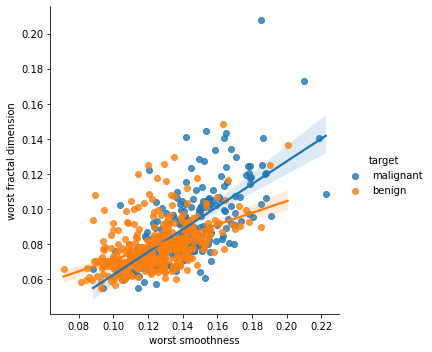

In [ ]:
import seaborn as sns
g = sns.lmplot(x = 'worst smoothness', y = 'worst fractal dimension', data = df, hue='target')

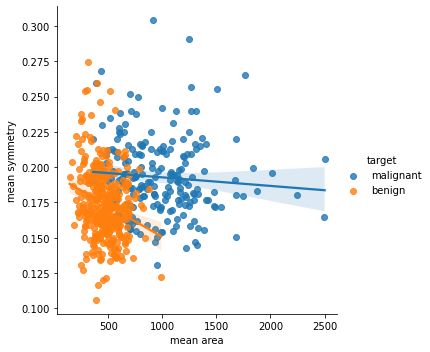

In [ ]:
g = sns.lmplot(x = 'mean area', y = 'mean symmetry', data = df, hue='target')

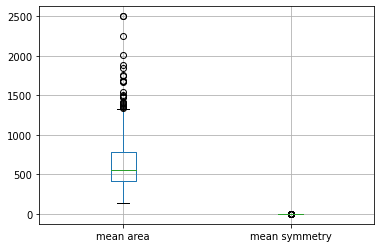

In [ ]:
df.boxplot(column=['mean area', 'mean symmetry'])

In [ ]:
#Standardising the features
from pandas._libs import index
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df.drop(columns='target')
new_data = scaler.fit_transform(data)
new_data_array = np.array(new_data)
new_df = pd.DataFrame(data = np.c_[new_data_array,df['target']], columns=np.append(dataset['feature_names'],['target']))

In [ ]:
new_df['mean area']= new_df['mean area'].astype('float64')
new_df['mean symmetry']= new_df['mean symmetry'].astype('float64') 

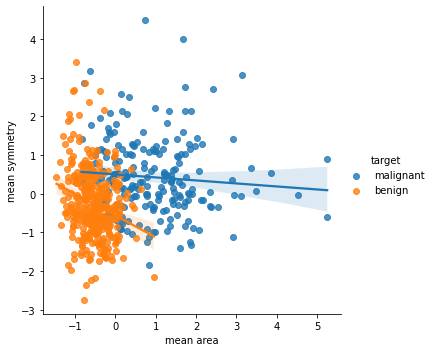

In [ ]:
g = sns.lmplot(x = 'mean area', y = 'mean symmetry' ,data = new_df, hue='target')

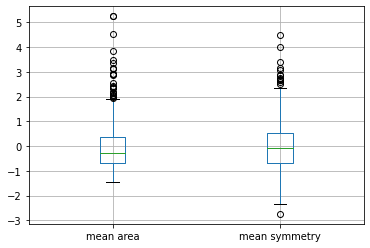

In [ ]:
new_df.boxplot(column=['mean area', 'mean symmetry'])

Both distributions of the two features appears to be the same when plotted using the seaborn.lmplot. But, when visualized using box plot we can see that the scales of the two features are almost the same after standardisation. This makes both the features equally important. 

## Part 2: KNN Classifier without Standardization





Text(0, 0.5, 'Cross-Validation Accuracy')

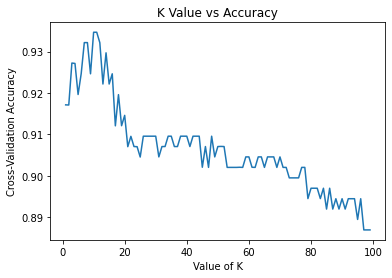

In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1,100)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
  k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.title('K Value vs Accuracy')
plt.xlabel('Value of K')
plt.ylabel('Cross-Validation Accuracy')



In [ ]:
# Highest cross validation accuracy and Best K
max_value = max(k_scores)
print("Highest Cross Validation Accuracy -",max_value)
print("Best K - ",[index for index, item in enumerate(k_scores) if item == max_value])

Highest Cross Validation Accuracy - 0.9346518987341772
Best K -  [9, 10]


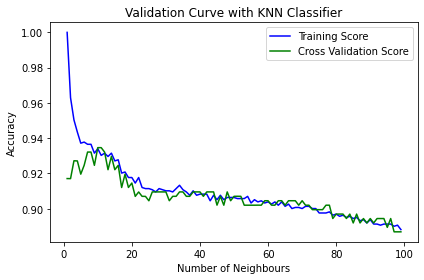

In [ ]:
from sklearn.model_selection import validation_curve

train_score, test_score = validation_curve(knn, X_train, y_train,param_name = "n_neighbors",param_range = k_range,cv = 5, scoring = "accuracy")
 
mean_train_score = np.mean(train_score, axis = 1)
mean_test_score = np.mean(test_score, axis = 1)

plt.plot(k_range, mean_train_score, label = "Training Score", color = 'b')
plt.plot(k_range, mean_test_score, label = "Cross Validation Score", color = 'g')

plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
 

K values between 0 to 5 leads to overfitting case (Accuracy in the training set is almost 100%). K values between 5 to 20 has high accuracy for both training and validation set. After this range the accuracy decreases. 

## Part 3: Feature Selection

  
  







 

In [ ]:
X_train.shape[1]

30

In [ ]:
#Feature Selection using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

def knn_full_feat(X,y):
  k_range = range(1,100)
  k_scores = []
  feature = []
  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv = 5, scoring = 'accuracy')
    k_scores.append(scores.mean())

  max_value = max(k_scores)
  print("cv_score",max_value)
  k_list = list()
  k_list = [index for index, item in enumerate(k_scores) if item == max_value]
  k_value = k_list[0]
  return max_value, k_value, feature, X.shape[1]

def Feature_selector (X , y , tr=0.95):
  k_value_list = list()
  cv_score_list = list()
  feat_rem_list = list()
  feat_count = list()
  features = np.array(dataset.feature_names)

  full_feat_cv_score, k_value, feature, feat = knn_full_feat(X,y)
  k_value_list.append(k_value)
  cv_score_list.append(full_feat_cv_score)
  feat_rem_list.append(feature)
  feat_count.append(feat)

  while(X.shape[1] > 1) :
    keys = list()
    values = list()
    feat_dict = dict()
    rm_list = list()
    feat_list = list()
    feat_min_list = list()

    dt = DecisionTreeClassifier()
    dt.fit(X, y)
    importance = dt.feature_importances_
    
    for i,v in enumerate(importance):
      keys.append(i)
      values.append(v)
      print('Feature: %0d, Score: %.5f' % (i,v))
    
    for i in range(len(keys)):
      feat_dict[keys[i]] = values[i]
    
    for key,value in feat_dict.items():
      if value == min(feat_dict.values()):
          rm_list.append(key)
      else:
          feat_list.append(key)

    X = np.delete(X, rm_list, 1)
    #print(rm_list)
    for i in rm_list:
      #print(len(features))
      feat_min_list.append(features[i])
    features = np.delete(features,rm_list)
    #print(features)
    print("X changed shape:",X.shape)
    k_range = range(1,100)
    k_scores = []

    for k in k_range:
      knn = KNeighborsClassifier(n_neighbors=k)
      scores = cross_val_score(knn, X, y, cv = 5, scoring = 'accuracy')
      k_scores.append(scores.mean())

    max_value = max(k_scores)
    print("cv_score",max_value)
    k_list = list()
    k_list = [index for index, item in enumerate(k_scores) if item == max_value]
    k_value = k_list[0]
    k_value_list.append(k_value)
    cv_score_list.append(max_value)
    feat_rem_list.append(feat_min_list)
    feat_count.append(X.shape[1])

    if (max_value < 0.95 * full_feat_cv_score):
      break

  return k_value_list, cv_score_list, feat_rem_list, feat_count


In [ ]:
k_value_list, cv_score_list, feat_list, feat_count = Feature_selector(X_train,y_train)

cv_score 0.9346518987341772
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01016
Feature: 3, Score: 0.01584
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01815
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00503
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.04749
Feature: 14, Score: 0.00919
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.01609
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00139
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.01068
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.08615
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00990
Feature: 26, Score: 0.02748
Feature: 27, Score: 0.72811
Feature: 28, Score: 0.01430
Feature: 29, Score: 0.00000
X changed shape: (398, 14)
cv_score 0.9346518987341772
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01815
Featur

In [ ]:
feat_list

[[],
 ['mean radius',
  'mean texture',
  'mean smoothness',
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean fractal dimension',
  'texture error',
  'perimeter error',
  'compactness error',
  'concavity error',
  'symmetry error',
  'worst radius',
  'worst perimeter',
  'worst smoothness',
  'worst fractal dimension'],
 ['mean perimeter', 'mean area', 'concave points error'],
 ['smoothness error'],
 ['radius error'],
 ['fractal dimension error'],
 ['worst compactness'],
 ['worst texture'],
 ['mean symmetry'],
 ['worst concavity'],
 ['worst symmetry'],
 ['area error'],
 ['worst area']]

In [ ]:
print(len(k_value_list))
print(len(cv_score_list))
print(len(feat_count))

13
13
13


In [ ]:
print(k_value_list)
print(cv_score_list)
print(feat_count)

[9, 9, 60, 60, 60, 60, 60, 63, 63, 63, 63, 33, 33]
[0.9346518987341772, 0.9346518987341772, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145886075949367, 0.9246202531645569]
[30, 14, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [ ]:
np_array = np.array(cv_score_list)
np_round_to = np.around(np_array, 2)
cv_score = list(np_round_to)

In [ ]:
cv_score

[0.93, 0.93, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.91, 0.92]

In [ ]:
features = [str(item) for item in feat_count]

In [ ]:
features

['30', '14', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1']

Text(0, 0.5, 'Accuracy')

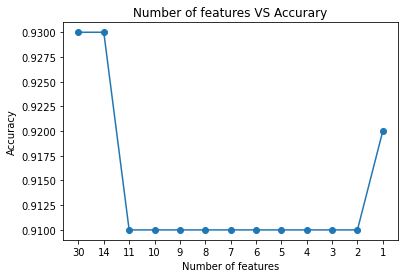

In [ ]:
plt.plot (features, cv_score, marker='o')
plt.title("Number of features VS Accurary")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")

The number of essential features for the classification is 14. The reason is that some features doesn't contribute that much to the classification, the presence of 14 features yeilds the highest accuracy and gives us the best K value. 

Text(0, 0.5, 'K value')

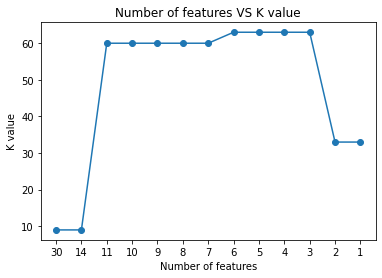

In [ ]:
plt.plot (features, k_value_list, marker = 'o')
plt.title("Number of features VS K value")
plt.xlabel("Number of features")
plt.ylabel("K value")

## Part 4: Standardization

In [ ]:
#Standardising the data
X_train_std = scaler.fit_transform(X_train)
k_value_std, cv_score_std, feat_list_std, feat_count_std = Feature_selector(X_train_std,y_train)

cv_score 0.9674367088607594
Feature: 0, Score: 0.01016
Feature: 1, Score: 0.02636
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01609
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00503
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01815
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.04749
Feature: 14, Score: 0.00139
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.01068
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.08615
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02616
Feature: 27, Score: 0.72811
Feature: 28, Score: 0.02421
Feature: 29, Score: 0.00000
X changed shape: (398, 12)
cv_score 0.9649683544303798
Feature: 0, Score: 0.01016
Feature: 1, Score: 0.01584
Feature: 2, Score: 0.00000
Featur

In [ ]:
np_array = np.array(cv_score_std)
np_round_to = np.around(np_array, 2)
cv_std = list(np_round_to)
features_std = [str(item) for item in feat_count_std]

In [ ]:
feat_new = list()
cv_new = list()
for i in range(len(features)):
  if features[i] in features_std:
    feat_new.append(features[i])
    cv_new.append(cv_score[i])

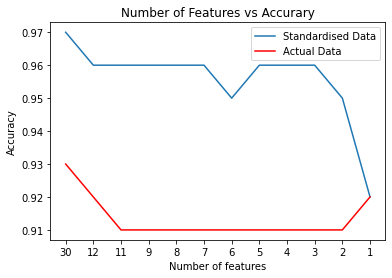

In [ ]:
plt.plot (features_std, cv_std, label = 'Standardised Data')
plt.plot (feat_new,cv_new, color = 'red', label = 'Actual Data')
plt.title("Number of Features vs Accurary")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.legend()

Standardising the data helped us improve the performance of the model. This can be observed from the graph above. The standardised data has a better accuracy when compared to the actual data. The accurary is highest for 30 features

K value (30 features) - 9 ('mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension')


## Part 5: Decision Tree Classifier


In [ ]:
#Decision Tree vs KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

parameters = {'max_depth': range(1,20), 'min_samples_split':range(2,20)}
clf = GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
clf.fit(X_train_std,y_train)
print("Decision Tree Mean CV Score:",clf.best_score_)

knn = KNeighborsClassifier(n_neighbors=9)
score = cross_val_score(knn, X_train_std, y_train, cv = 5, scoring = 'accuracy')
print("KNN Mean CV Score:",score.mean())


Decision Tree Mean CV Score: 0.9321518987341773
KNN Mean CV Score: 0.9598417721518986


## Part 6: Test Data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

knn = KNeighborsClassifier(n_neighbors=9)
score = cross_val_score(knn, X_test, y_test, cv = 5, scoring = 'accuracy')
print("Test Data Mean CV Score:",score.mean())

Test Data Mean CV Score: 0.9300840336134453


The training accuracy was highest (96.7%) in the case of standardised training set with 30 features. It had a K value of 9. When we use this value on the test data we get an accuracy of 93%.